# Signal temporal Logic ⏲️

From the previous notes on [linear systems](simple_linear_systems.ipynb) we have introduced how we treat solutions of linear dynamical systems. It now remains to clarify how can we obtain interesting trajectroies that satisfy such dynamics. In this regard, we can consider a formal language defined on continuous-time signals: Signal Temporal Logic (STL).

## Intro
Imagine we are given a `spot` robot for Christmas and we want to start playing with it. You quickly get your remote controller and start moving spot left and right and walk a bit forward and then backward.... This becomes quicly boring unless we give something more interesting to do. Willing to suprise your parents that just gifted you this amazing present you start thinking :

"What if I could ask spot to go to the fridge in the next minute and take a beer for me. I want spot to eventually bring the beer to my mum between 3 anf 4 minutes after taking the beer and then come back to me."

If you find these types of specifications interesting, welcome to the world of [temporal logics](https://en.wikipedia.org/wiki/Temporal_logic), a family of logics to deal with spatially and temporally extended specifications!


<img src="_static/mobile-agile-robot-spot-makes-3d-map-radioactive-section-uk-nuclear-plant.png" alt="image" width="600" title=" credits: https://www.google.com/search?q=spot+robot+in+map&sca_esv=39daea3b50f3b6b8&udm=2&biw=1536&bih=794&sxsrf=AHTn8zpeM7iYvtr3hs-4459NW5Jh_Rmpzw%3A1747374933173&ei=VdMmaNCzCq_7wPAPntSU0Qs&ved=0ahUKEwiQsrnxpqeNAxWvPRAIHR4qJboQ4dUDCBQ&uact=5&oq=spot+robot+in+map&gs_lp=EgNpbWciEXNwb3Qgcm9ib3QgaW4gbWFwSNUMUJ4EWO4JcAF4AJABAJgBXqABywKqAQE3uAEDyAEA-AEBmAIFoALoAcICChAAGIAEGEMYigXCAgYQABgHGB7CAgUQABiABMICBBAAGB7CAgYQABgIGB6YAwCIBgGSBwE1oAewFbIHATS4B-MBwgcFMC4yLjPIBw8&sclient=img#vhid=WzDafbigIfMZHM&vssid=mosaic."/>

image credits: [Boston dynamics](https://www.google.com/search?q=spot+robot+in+map&sca_esv=39daea3b50f3b6b8&udm=2&biw=1536&bih=794&sxsrf=AHTn8zpeM7iYvtr3hs-4459NW5Jh_Rmpzw%3A1747374933173&ei=VdMmaNCzCq_7wPAPntSU0Qs&ved=0ahUKEwiQsrnxpqeNAxWvPRAIHR4qJboQ4dUDCBQ&uact=5&oq=spot+robot+in+map&gs_lp=EgNpbWciEXNwb3Qgcm9ib3QgaW4gbWFwSNUMUJ4EWO4JcAF4AJABAJgBXqABywKqAQE3uAEDyAEA-AEBmAIFoALoAcICChAAGIAEGEMYigXCAgYQABgHGB7CAgUQABiABMICBBAAGB7CAgYQABgIGB6YAwCIBgGSBwE1oAewFbIHATS4B-MBwgcFMC4yLjPIBw8&sclient=img#vhid=WzDafbigIfMZHM&vssid=mosaic.)


## Dealing with  STL formulas

The main ingreadients to define STL formulas are three 

### Predicates
A set of predicates defining the spatial component of the formula. In the example above we have three predicates. The location of the fridge, mum's location and your location. It is typical to associate predicates with a function that returns a value of true when the predicate is reached  and false otherwise. If we look at the map below each location can be describe a polytope!

<img src="_static/simple_map.png" alt="image" width="600" />

The is a very formal way to define predicates. First we need a scalar function that is postive where we want the predicate to be true and negeative otherwise. With polytopes this is simple. First recall the linear system
$$

\dot{x} = A x + bu
$$
for which we can define an output $y$ for some matrix $C$ as
$$
y = Cx
$$
We will impose temporal specifications on the output of the system. Namely, if we consider a systsme with state given by $x = [p,v]$ where p is the position and v is the velocity, then we could be mainly interested in setting a specification on the position, which is easily selected by choosing the matrix 

$$
C = [I_2 , 0_2] \quad p = Cx 
$$

where $I_2$ and $0_2$ are just an identity matrix and a zero matrix of dimension $2\times 2$. We can then define a specific location using a polyhedron of the form $\{x\mid ACx \leq b\}$ , which is equivalent to $\{ x \mid h(x)\geq 0 \}$ where 
$$
h(x) = min \{-a_k^TCx + b_k\} 
$$
and $a_k$ is the k-th row of the matrix A and $b_k$ is the k-th element of b. A predicate is defined as a boolean encoding that gives the value *True* whena  state is inside the prediacte! Namely, a predicate $\mu : \mathbb{R}\rightarrow \{\top,\bot\}$ is defined as

$$
\mu^h = \mu(h(\vec{x})) := \begin{cases}
\top &\text{if} \; h(\vec{x})\geq 0 \\
\bot &\text{if} \; h(\vec{x})<0 ,
\end{cases}
$$


### STL grammar
The second ingredient that we need is a way to construct temporally extended specifications from a given set of predicates. This is what we can the STL *grammar*. We won't explain here 

$$
\begin{gathered}
    \varphi ::= G_{[a,b]}\mu^{h} \mid  F_{[a,b]}\mu^{h} \mid G_{[a,b]}F_{[a',b']}\mu^{h} \mid F_{[a,b]}G_{[a',b']} \mu^{h}, \\
    \phi ::= \varphi\mid \varphi_1 \land \varphi_2,
\end{gathered}
$$

Where:

- $\mu^h$ is a predicate (e.g., "robot is inside goal region A")
- $G_{[a,b]}$ = “**Always** between time $a$ and $b$”
- $F_{[a,b]}$ = “**Eventually** between time $a$ and $b$”
- $\land$ is logical **AND**

Here are some examples to give you some intuition of the tasks that we can specify.


1) "Stay in goal region A $\mu^{h}_A$ always between 5s and 10s.""

$$
G_{[5,10]} \, \mu^{h}_A
$$

2) "Visit goal region A $\mu^{h}_A$ eventually between 5s and 10s.""

$$
F_{[0,8]} \, \mu^{h}_A
$$


3) "Every 2s in [0,6], the robot must reach goal A $\mu^{h}_A$ within the next 1–2s."

$$
G_{[0,6]} \, F_{[1,2]} \, \mu^{h}_A
$$


4) "At some time in [3,6], the robot enters goal A $\mu^{h}_A$ and stays there for 1s."

$$
F_{[3,6]} \, G_{[0,1]} \, \mu^{h}_A
$$

5) "Eventually reach goal A between 0s and 5s, and always stay in goal B between 6s and 8s."

$$
F_{[0,5]} \, \mu^{h}_A \; \land \; G_{[6,8]} \, \mu^{h}_B
$$


### STL semantics

The third and last ingredient needed is a a way to decide if a given trajectory satisfies or not a given specification. In this respect there are many different types of way to do so and we won't delve into the details here. For the moment it will be sufficient for the reader to remember that there is a way to encode an STL task into a functional. A functional is a function that take as an input a trajectory (i.e. a functional is a function of a function) and retruns a scalar number. If the number is strictly positive, then the formula is satisfied and it is false if it is strictly negative. If it is exactly zero, well this is technically an undecided case, but we could safely say that in this case the formula is practically satisfied. Such functional takes the name of quantitative sematics and it is recursively defined as 

$$
\begin{align}
\rho^{\mu}(\zeta_x,t)&=h(\zeta_x(t)),\\
\rho^{\neg \phi}(\zeta_x,t)& = -\rho^{\phi}(\zeta_x,t), \\
\rho^{F_{[a, b]} \phi}(\zeta_x,t)&=\max _{\tau \in t\oplus [a, b]} \{\rho^\phi\left(\zeta_x, \tau \right)\}, \\
\rho^{G_{[a, b]} \phi}(\zeta_x,t)&= \min _{\tau \in t\oplus[a, b]} \{\rho^\phi\left(\zeta_x, \tau\right)\},\\
\rho^{\phi_1 U_{[a,b]}\phi_2}(\zeta_x,t) &= \max_{\tau \in t\oplus[a,b]} \\ 
& \hspace{-1.5cm} \{ \min\{\rho^{\phi_2}(\zeta_x, \tau ), \min_{\tau' \in [t,\tau]} \rho^{\phi_1}(\zeta_x,\tau')\}\},\\
\rho^{\phi_1 \wedge \phi_2}(\zeta_x,t)& = \min \left\{\rho^{\phi_1}(\zeta_x,t), \rho^{\phi_2}(\zeta_x,t)\right\}, 
\end{align}
$$

## Coding with STL formulas

To code STL formulas, this can be done simply using the logical syntax of Python. Here is a simple example that creates multiple formulas of type $F_{[a,b]}G_{[a',b']} \mu^h$

In [ ]:
import numpy as np
from stl_tool.stl import GOp, FOp, BoxBound, ContinuousLinearSystem

A = np.block([
    [np.zeros((3, 3)), np.eye(3)],  # dp/dt = v
    [np.zeros((3, 3)), np.zeros((3, 3))]  # dv/dt = a (from input)
])

B = np.block([
    [np.zeros((3, 3))],  # no control in position derivative
    [np.eye(3)]          # control enters velocity derivative
])

system        = ContinuousLinearSystem(A, B, dt=0.1) # create a continuous linear system with the given A and B matrices

visit_period             = 400
interest_point_1_center  = np.array([-100., 100., 0.])
box_predicate_1          =  BoxBound(dims = [0,1,2], size = 70, center = interest_point_1_center) # creates a box over the first three dimension  of the system (so on the positon).
visit_time1              = 1000.
formula1                 = (FOp(visit_time1,visit_time1+ visit_period/4) >> (GOp(0, visit_period) >> box_predicate_1)) # connect operators with the syntax "">>""

interest_point_2_center  = np.array([-100., -100., 0.])
box_predicate_2          =  BoxBound(dims = [0,1,2], size = 70, center = interest_point_2_center)
visit_time2              = 2500.
formula2                 = (FOp(visit_time2,visit_time2+ visit_period/4) >> (GOp(0, visit_period) >> box_predicate_2))

interest_point_4_center  = np.array([0., 0., 100.])
box_predicate_4          =  BoxBound(dims = [0,1,2], size = 70, center = interest_point_4_center)
visit_time4              = 3500.
formula4                 = (FOp(visit_time4,visit_time4+ visit_period/4) >> (GOp(0, visit_period) >> box_predicate_4))

interest_point_3_center  = np.array([100., 100., 0.])
box_predicate_3          =  BoxBound(dims = [0,1,2], size = 70, center = interest_point_3_center)
visit_time3              = 5000.
formula3                 = (FOp(visit_time3,visit_time3+ visit_period/4) >> (GOp(0, visit_period) >> box_predicate_3))


formula        = formula1 & formula2 & formula3 & formula4 # create the conjunction
                

You can visualize your formula as a graph using the following syntax.

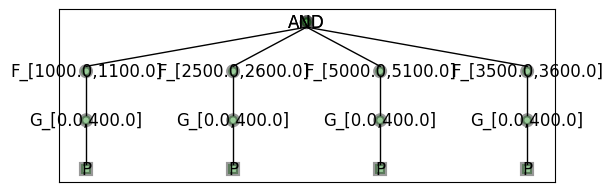

In [5]:
from   matplotlib import pyplot as plt
formula.show_graph()

You can also visualize the polytope thst each predicate represents!

In [7]:
print(box_predicate_3.polytope)

Hyperplane representation of polytope
  [[ 1.00000   0.00000   0.00000] |    [135.00000]
   [ 0.00000   1.00000   0.00000] |    [135.00000]
   [ 0.00000   0.00000   1.00000] |    [ 35.00000]
   [-1.00000  -0.00000  -0.00000] |    [-65.00000]
   [-0.00000  -1.00000  -0.00000] |    [-65.00000]
   [-0.00000  -0.00000  -1.00000] x <= [ 35.00000]

